In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as ps 
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Data Analysis

In [51]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [84]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
data_train.shape

(891, 12)

In [87]:
data_test.shape

(418, 11)

In [ ]:
#Ok, so it has 891 rows and 12 columns in train dataset, and 418 rows and 11 columnsin test dataset.

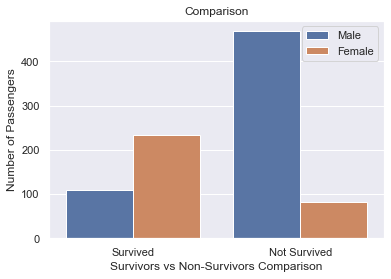

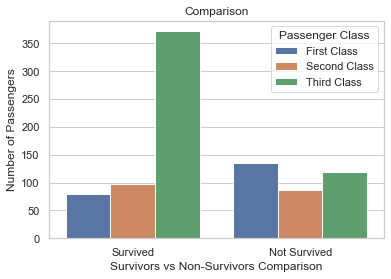

In [105]:
#The survival rate varies greatly depending on the sex and age.

sns.set_theme(style="darkgrid")
sns.countplot(x= "Survived", hue="Sex", order=[1, 0], data = data_train).set(xticklabels=["Survived", "Not Survived"])
plt.xlabel("Survivors vs Non-Survivors Comparison")
plt.ylabel("Number of Passengers")
plt.title("Comparison")
plt.legend(labels=["Male", "Female"])
plt.show()


sns.set_theme(style="whitegrid")
sns.countplot(x= "Survived", hue="Pclass", data = data_train).set(xticklabels=["Survived", "Not Survived"])
plt.xlabel("Survivors vs Non-Survivors Comparison")
plt.ylabel("Number of Passengers")
plt.title("Comparison")
plt.legend(title='Passenger Class', loc='upper right', labels=["First Class", "Second Class", "Third Class"])
plt.show()

In [83]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
#preparing data for fit
X = data_train.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age':X.Age.median()})
y = data_train['Survived']

In [81]:
X.head(891)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [80]:
test_data = data_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_data = pd.get_dummies(test_data)
test_data = test_data.fillna({'Age':test_data.Age.median(),'Fare':0})

In [60]:
from sklearn.model_selection import train_test_split        #split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 1, test_size = 0.75)

In [95]:
clf=tree.DecisionTreeClassifier()       #Decision Tree
parametrs = {'criterion':['gini', 'entropy'], 'max_depth': range(2,8), 'min_samples_split': range(2,10),
             'min_samples_leaf': range(2,10)}
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)    #cross val
grid_search_cv_clf.fit(X_train, Y_train)

best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test,Y_test)

0.7892376681614349

In [24]:
rf = RandomForestClassifier(n_estimators=100)     #Random Forest
parametrs = {'criterion':['gini', 'entropy'], 'max_depth': range(2,10), 'min_samples_split': range(2,5),
            'min_samples_leaf': range(2,5)}    #defining parameters for cross val
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv=5) #cross validation
grid_search_cv_clf.fit(X_train, Y_train)

best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test,Y_test)

0.7907324364723468

In [ ]:
grid_search_cv_clf.predict(test_data)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting
gbk = GradientBoostingClassifier()
gbk.fit(X_train,Y_train)
gbk.score(X_test,Y_test)

0.7832585949177877

In [102]:
pred_rf = gbk.predict(test_data) 

In [103]:
Results = pd.DataFrame(pred_rf, columns=['Survived'])    #creating data frame
Results['PassengerId'] = Results.index + 892             #setting index, there are 892 passingers in train data
Results = Results[['PassengerId', 'Survived']]           #adding PassingerId column

In [104]:
Results.head(418)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
